Задача: Построить вычислительный граф для метода обратного распространения ошибки.

Основная идея - производные функции потерь по параметрам нейросети находятся по правилу сложной производной

Источник картинки: [видео](https://youtu.be/rt6Y9mj6et8?si=GDidO3ccucKDtP3s&t=1012) (не рекомендуется смотреть)


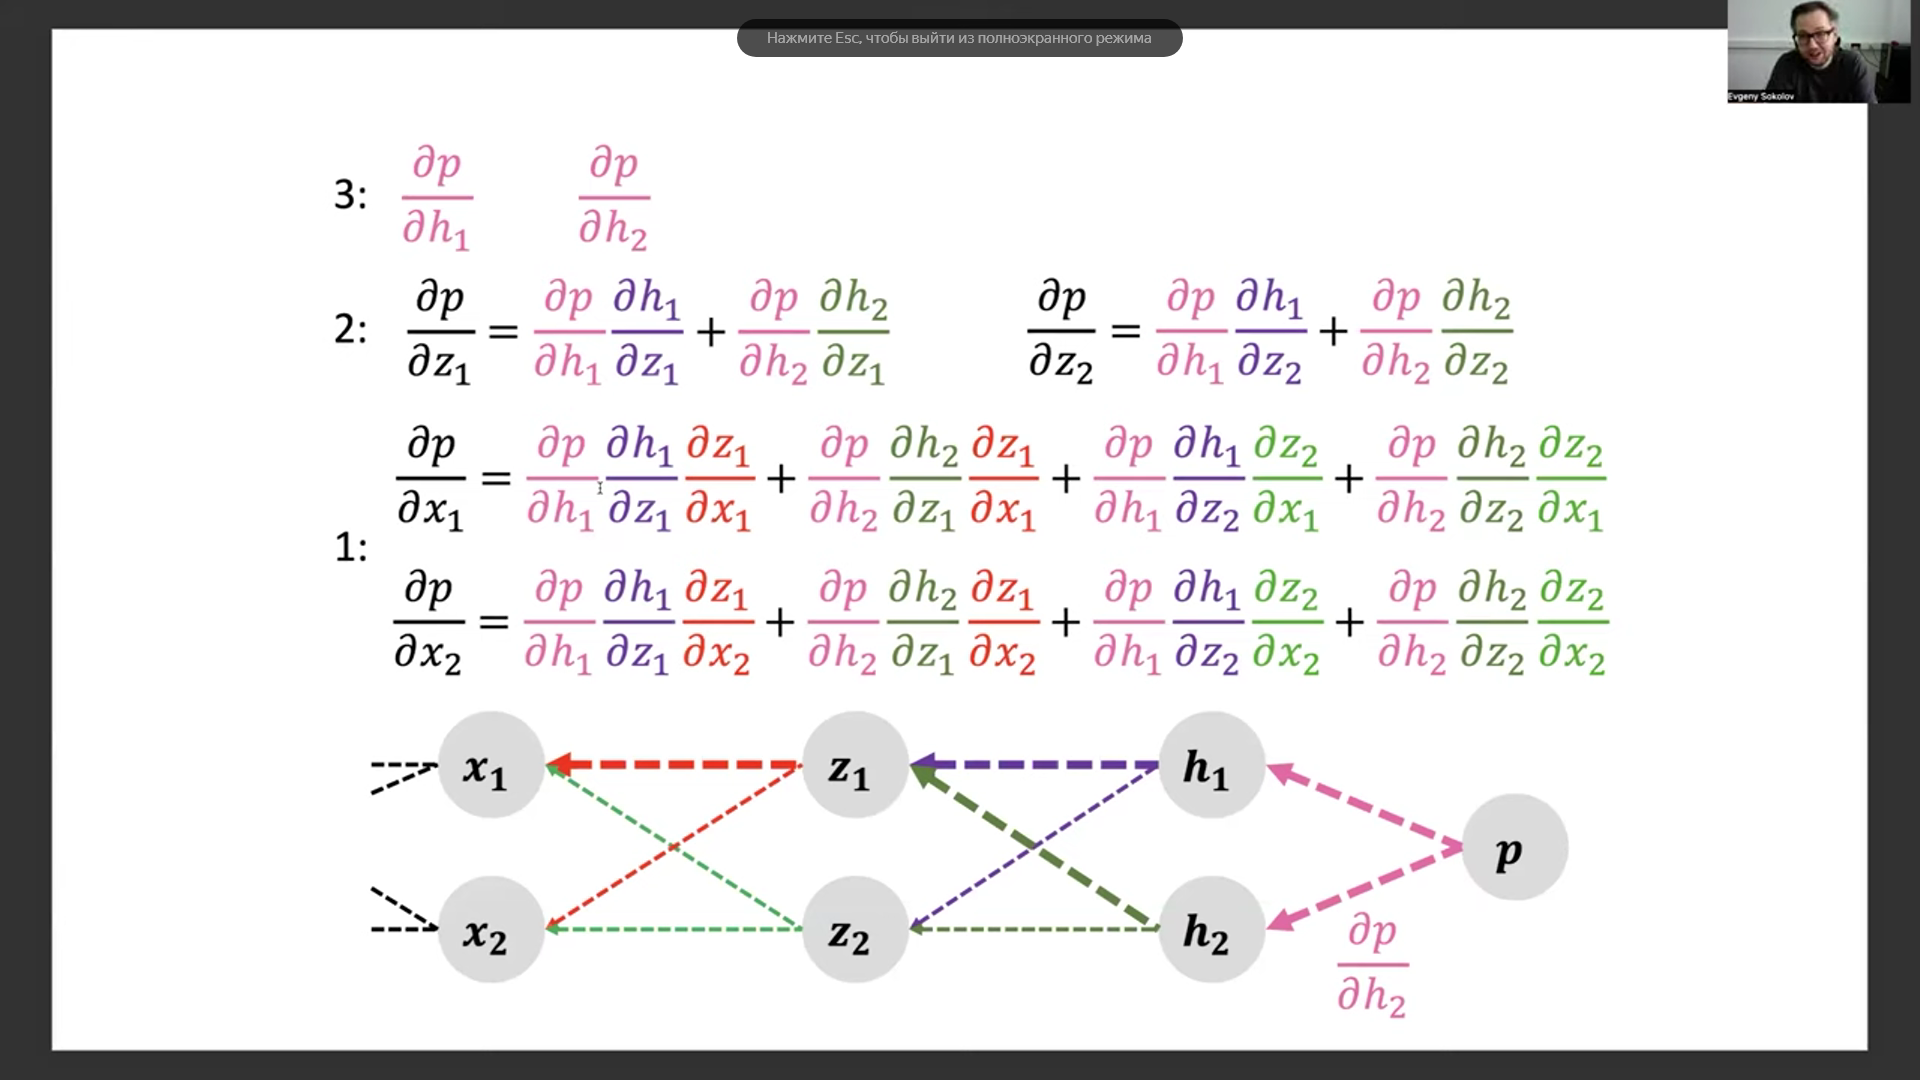


# Пример 1

Пошаговая демонстрация: [видео (EN)](https://youtu.be/dB-u77Y5a6A?si=N5d-m5yq_71q8pn4&t=504) (рекомендуется смотреть)

Функция $f(x,y,x)=(x+y)z$

Входные значения $x=-2;  y=5; z=-4$



Обозначения на диаграмме графа вычислений:
* Зеленым обозначены результаты вычислений прямого прохода (forward pass)
* Красным обозначены результаты вычислений обратного прохода (backward pass)
* В скобках указан порядковый номер вычисления (только для обратного прохода)

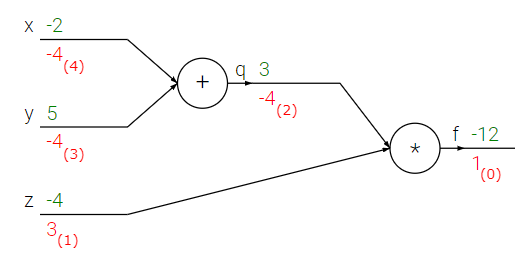


**Forward pass**

1. $ q = x + y = 3 $

2. $ f = qz = -12 $

**Backward pass**

0. $ \Large\frac{df}{df} = 1$

1. $ \Large\frac{df}{dz} = \frac{d(qz)}{dz} = q = 3$

2. $ \Large\frac{df}{dq} = \frac{d(qz)}{dq} = z = -4$

3. $ \Large\frac{df}{dy} = \frac{df}{dq}\frac{dq}{dy} = \frac{df}{dq}\frac{d(x+y)}{dy} = z = -4$


4. $ \Large\frac{df}{dx} = \frac{df}{dq}\frac{dq}{dx} = \frac{df}{dq}\frac{d(x+y)}{dx} = z = -4$

# Пример 2

Пошаговая демонстрация: [видео (EN)](https://youtu.be/dB-u77Y5a6A?si=3X5gElUnIjehKUH8&t=1059)

В любом узле вычислительного графа присутствуют градиенты трех типов:
* входящий (upstream), т.е вычисленный на предыдущем шаге
* локальный (local), т.е. вычисляемый на текущем шаге для текущего узла
* исходящие (downstream), т.е. вычисляемые на текущем шаге для последующих узлов (в обратном направлении прохода) с использованием правила производной сложной функции (chain rule)

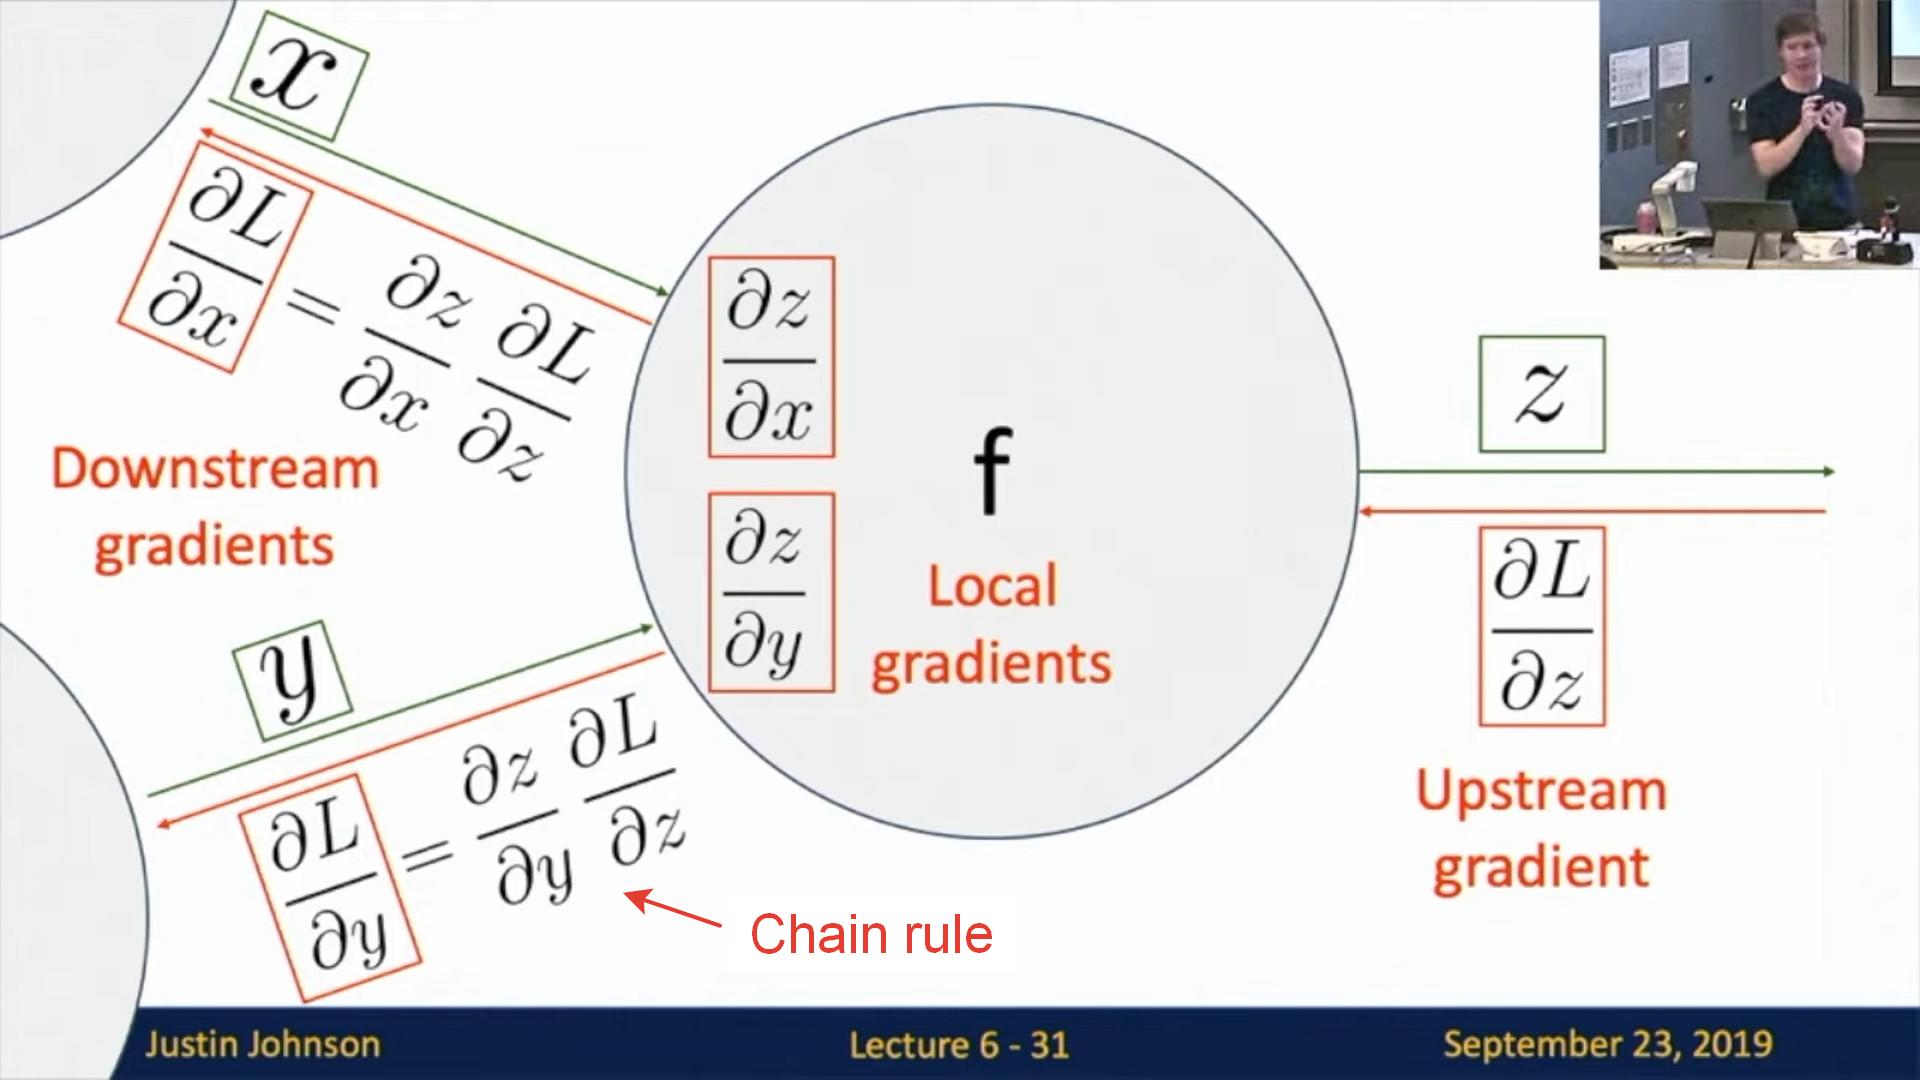

Функция $f(x,w)=\Large\frac{1}{1+e^{-(w_0x_0+w_1x_1+w_2)}}$

Веса: $w_0=2, w_1=-3, w_2=-3$

Входные значения $x_0=-1, x_1=-2$

**Forward pass**

... вычисление всех операций ...

$ f(x,w)= ... = 0.73 $





**Backward pass**

0. $ \nabla_{base}=\Large\frac{df}{df} = \normalsize1$

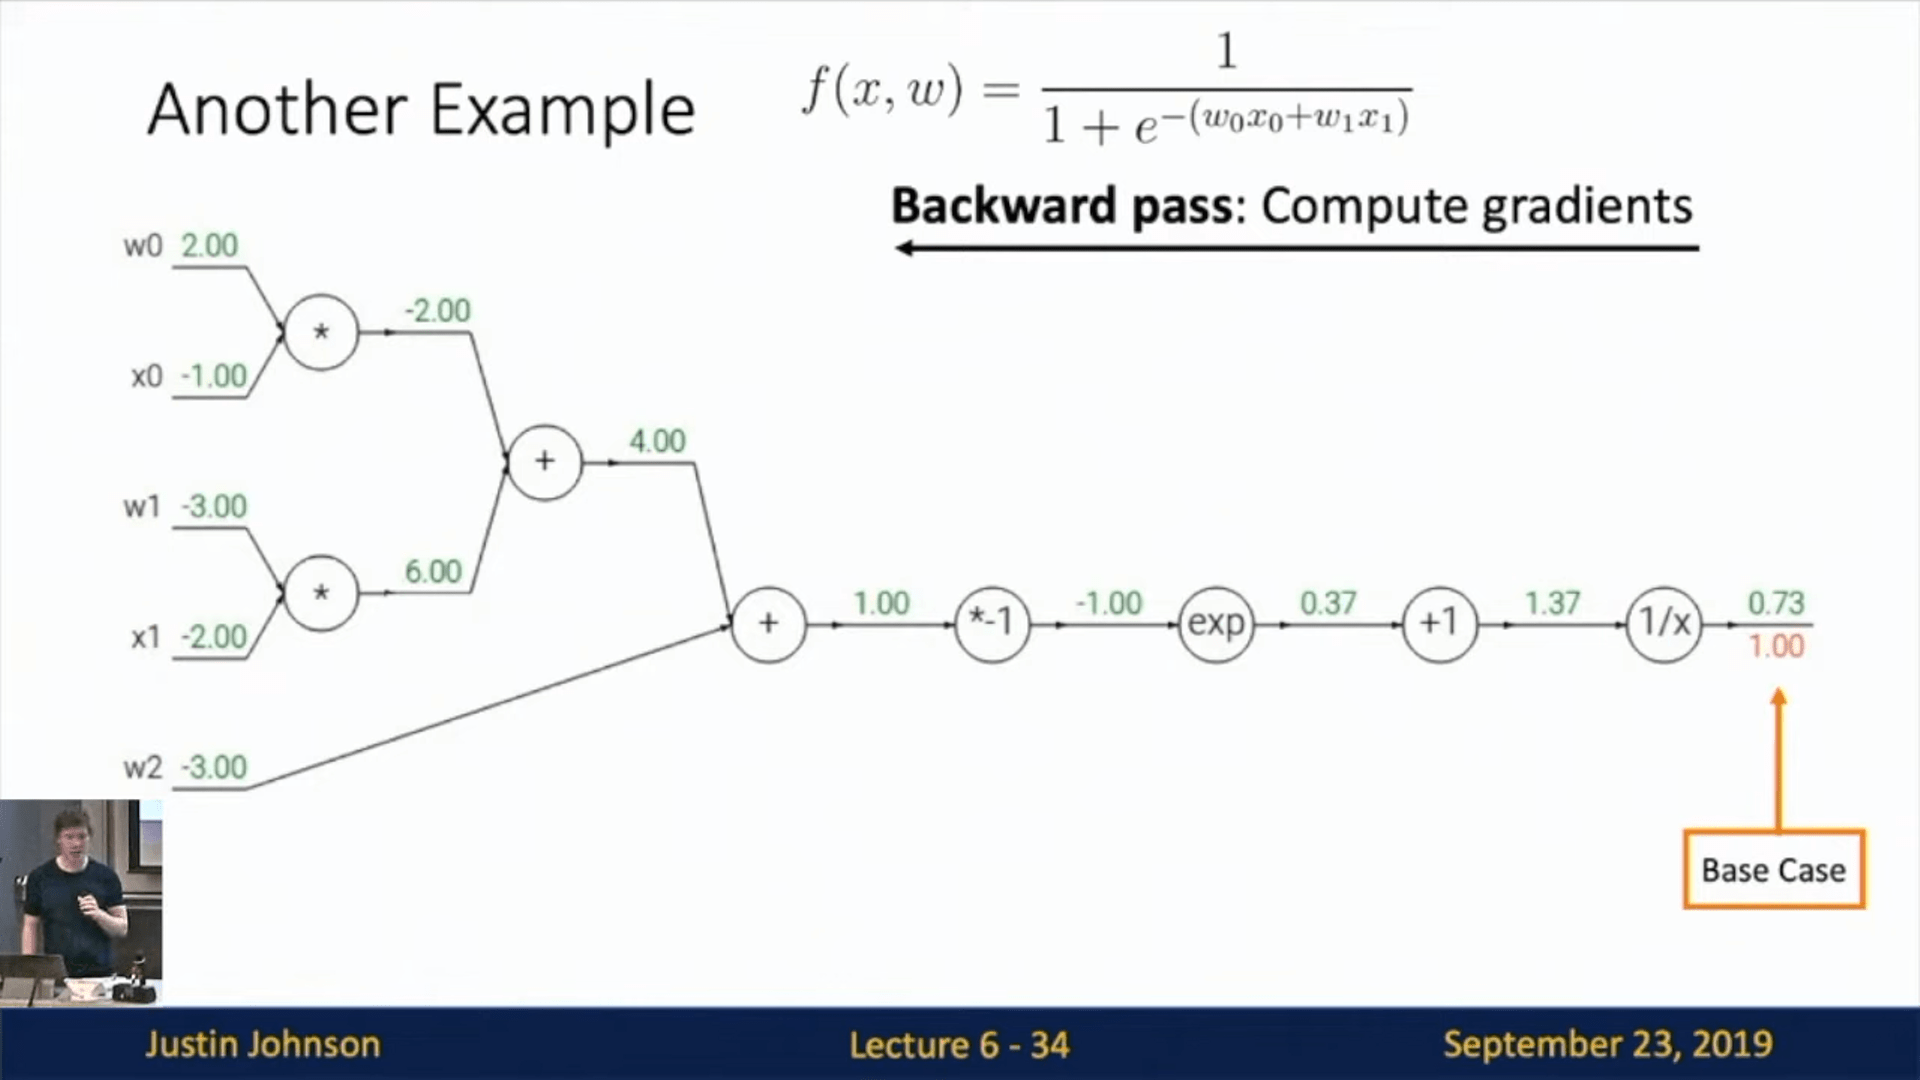


1. Function $ \frac{1}{x} $
    * $ \nabla_{upstream} = \nabla_{base} = 1$

    * $ \nabla_{local} \Large\frac{d(1/x)}{dx} = \frac{1}{x^2} = -\frac{1}{1.37^2}=\normalsize-0.53$

    * $ \nabla_{downstream} = \nabla_{upstream}\cdot\nabla_{local}= 1 \cdot (-0.53) = -0.53$



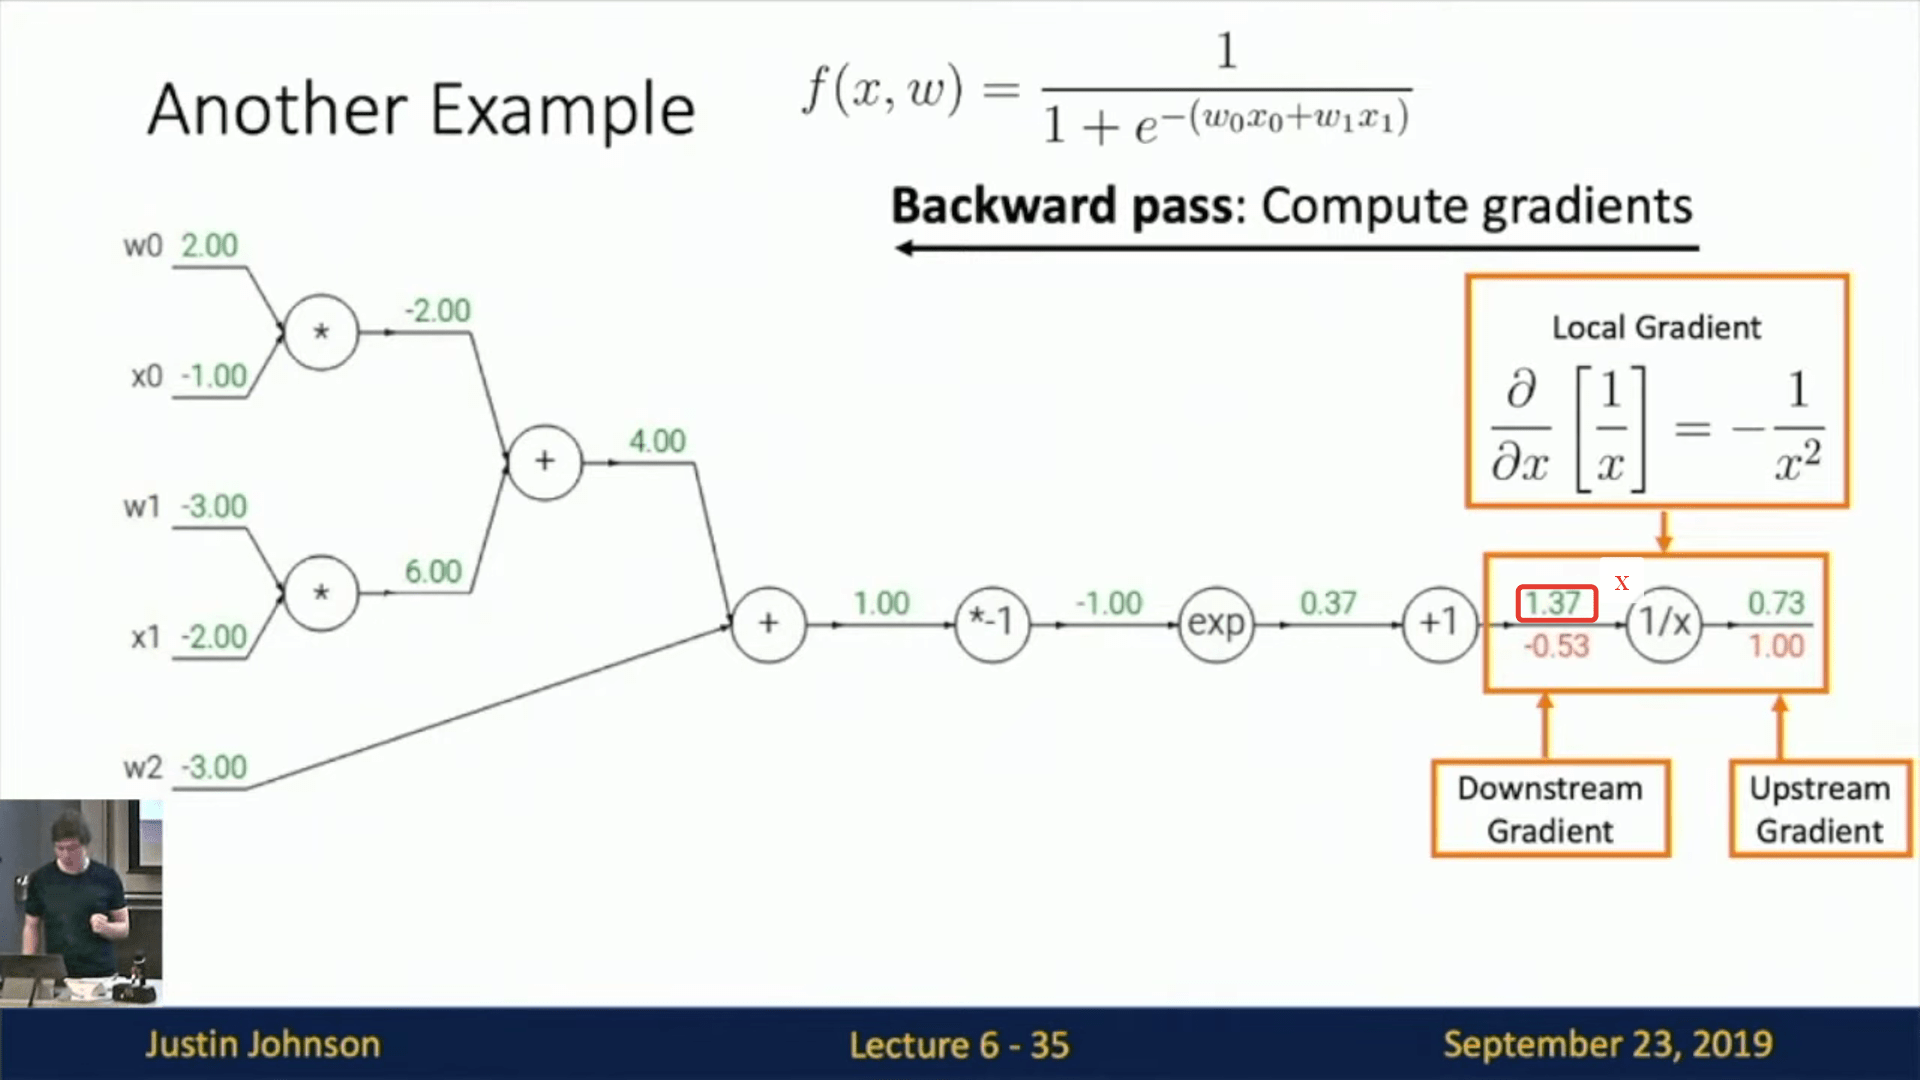

2. Function $ x + 1 $
    * $ \nabla_{upstream} = \nabla_{downstream} = -0.53 $

    * $ \nabla_{local} = \Large\frac{d(x+1)}{dx}= 1 $

    * $ \nabla_{downstream} = \nabla_{upstream}\cdot\nabla_{local}= -0.53 \cdot 1 = -0.53$



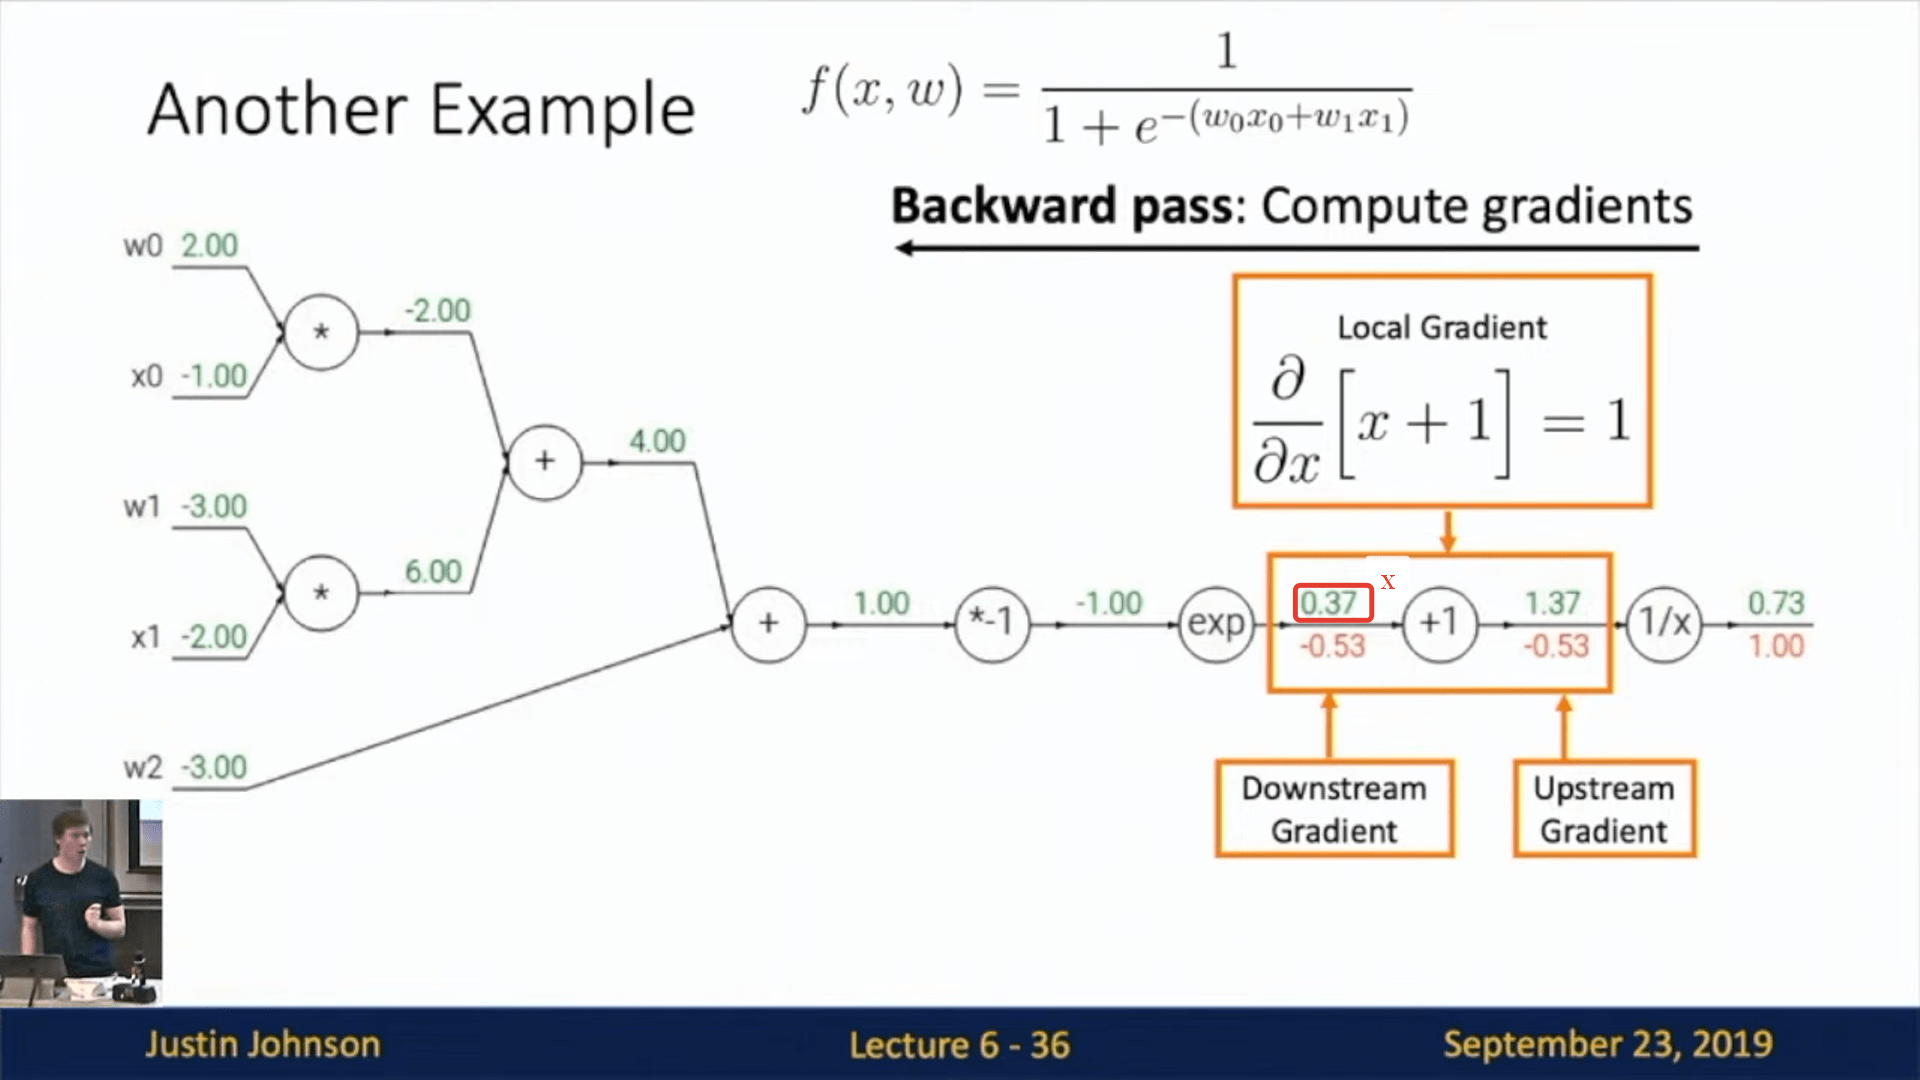


3. Function $ e^x $
    * $ \nabla_{upstream} = \nabla_{downstream} = -0.53 $

    * $ \nabla_{local} = \Large\frac{e^x}{dx}=e^x=e^{-1}=\normalsize0.37$

    * $ \nabla_{downstream} = \nabla_{upstream}\cdot\nabla_{local}= 0.37\cdot(-0.53) = -0.19$

*Примечание* На слайдах значение 0.19 неверно округлено до 0.20

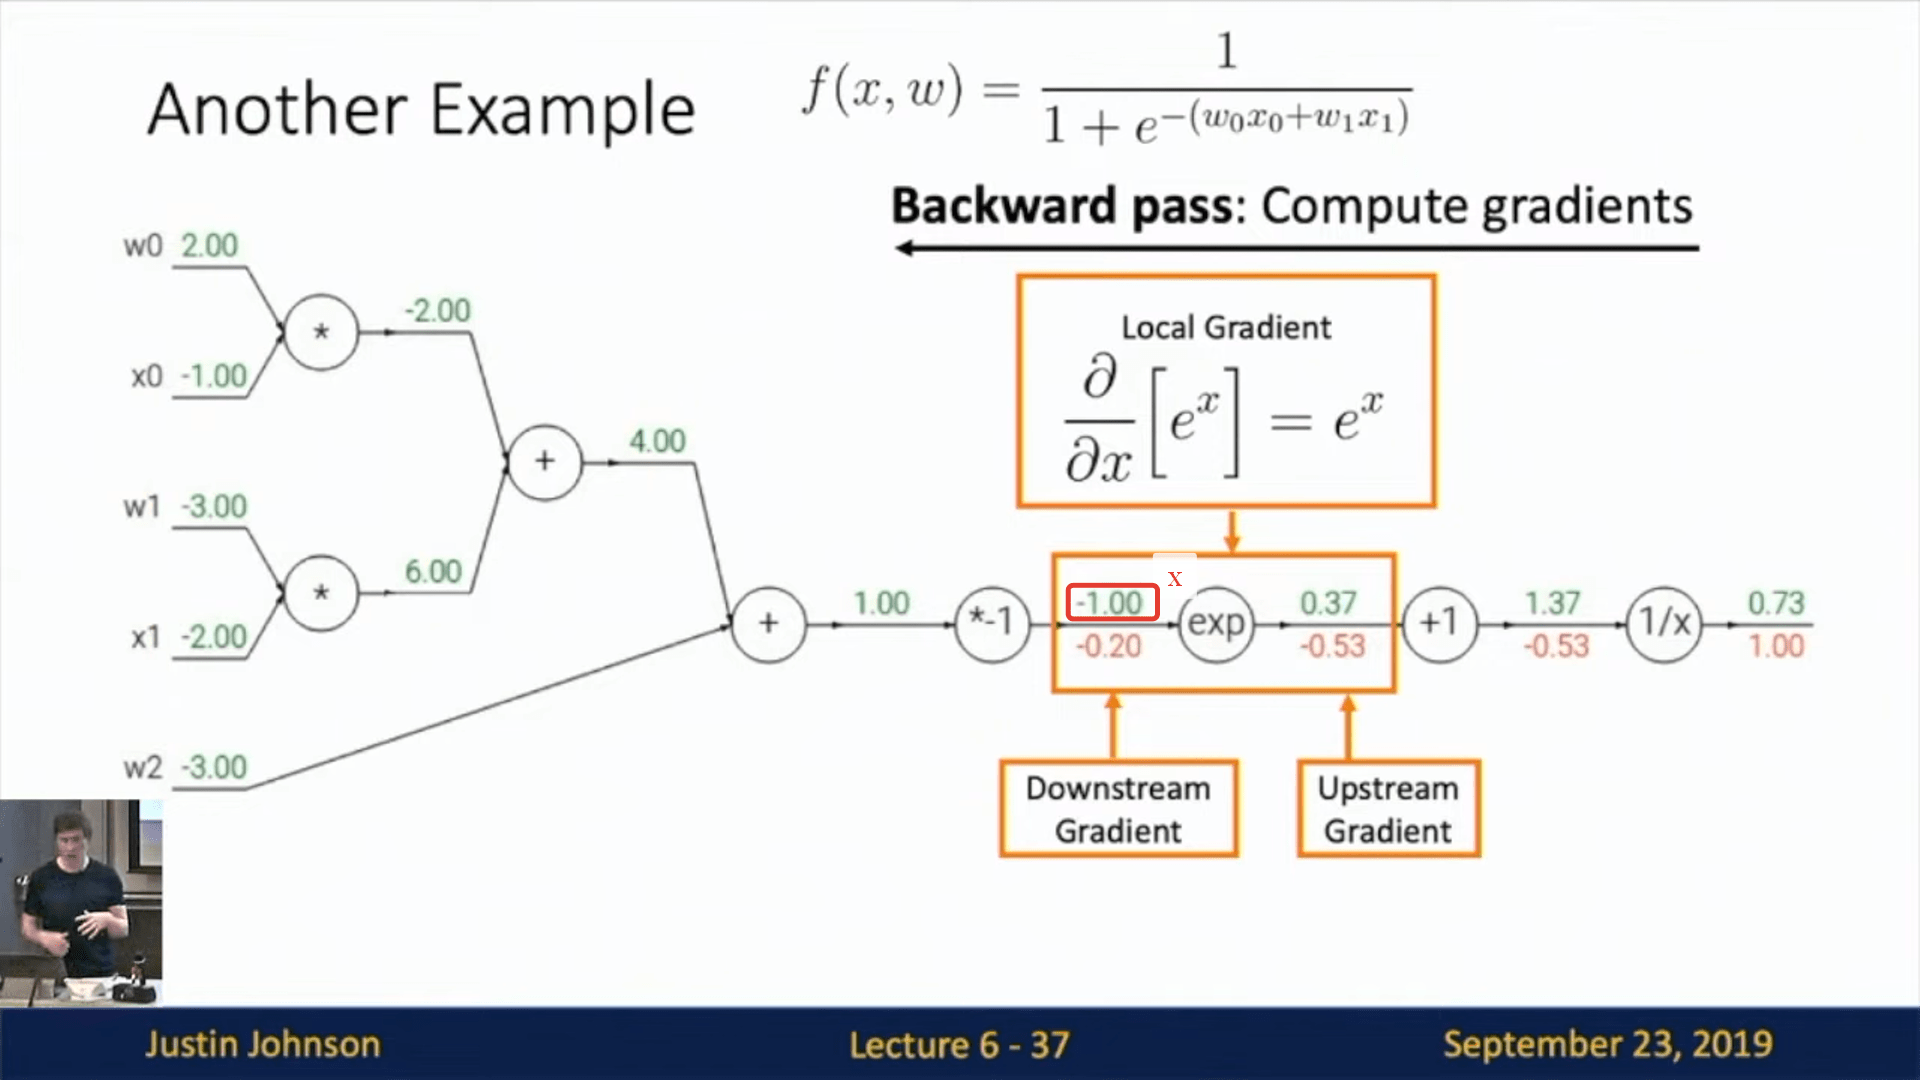


4. Function $ x + y $
    * $ \nabla_{upstream} = \nabla_{downstream} = -0.19$

    * $ \nabla_{local(x)} = \Large\frac{d(x+y)}{dx}=1$
    * $ \nabla_{local(y)} = \Large\frac{d(x+y)}{dx}=1$
    * $ \nabla_{downstream(x)} = \nabla_{upstream}\cdot\nabla_{local(x)}= 0.19\cdot(1) = 0.19$
    * $ \nabla_{downstream(y)} = \nabla_{upstream}\cdot\nabla_{local(y)}= 0.19\cdot(1) = 0.19$

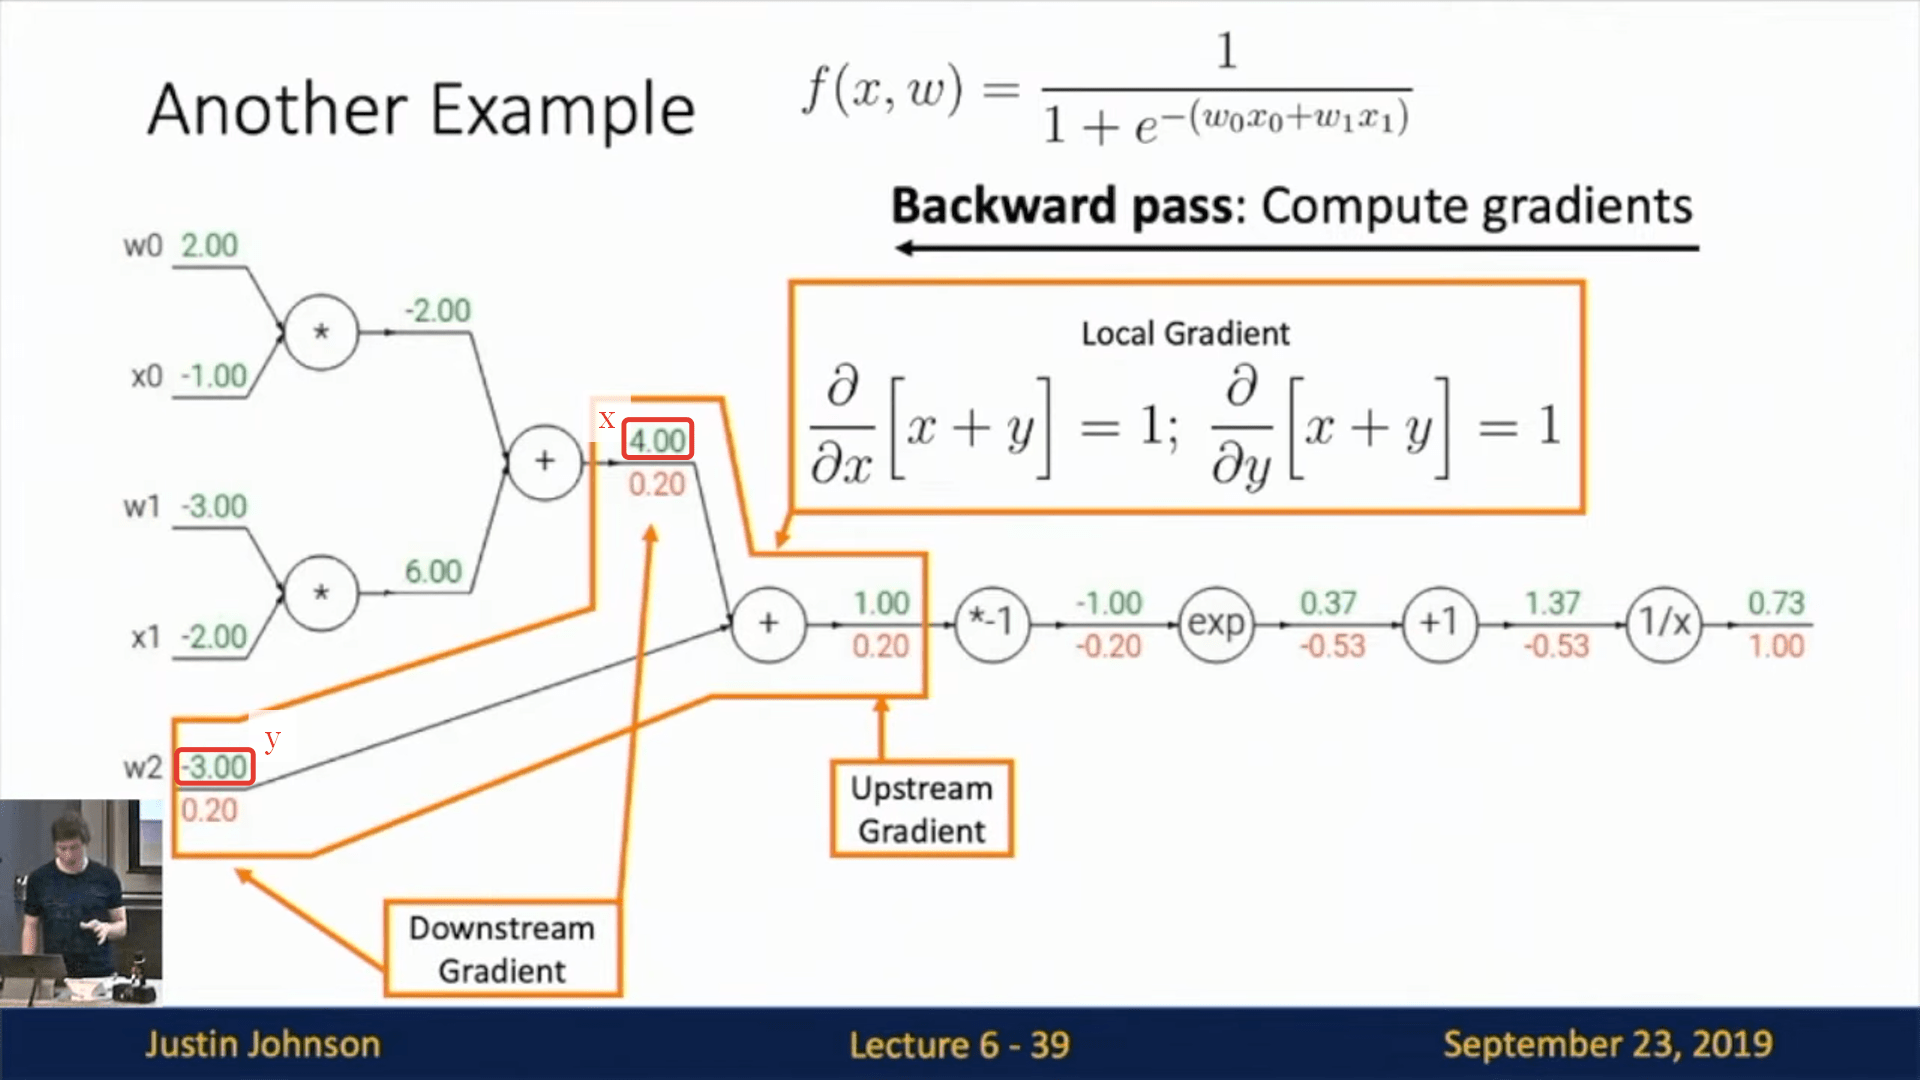



5. Function $ x + y $
    * $ \nabla_{upstream} = \nabla_{downstream} = -0.19$
    * $ \nabla_{local(x)} = \Large\frac{d(x+y)}{dx}=1$
    * $ \nabla_{local(y)} = \Large\frac{d(x+y)}{dx}=1$
    * $ \nabla_{downstream(x)} = \nabla_{upstream}\cdot\nabla_{local(x)}= 0.19\cdot(1) = 0.19$
    * $ \nabla_{downstream(y)} = \nabla_{upstream}\cdot\nabla_{local(y)}= 0.19\cdot(1) = 0.19$

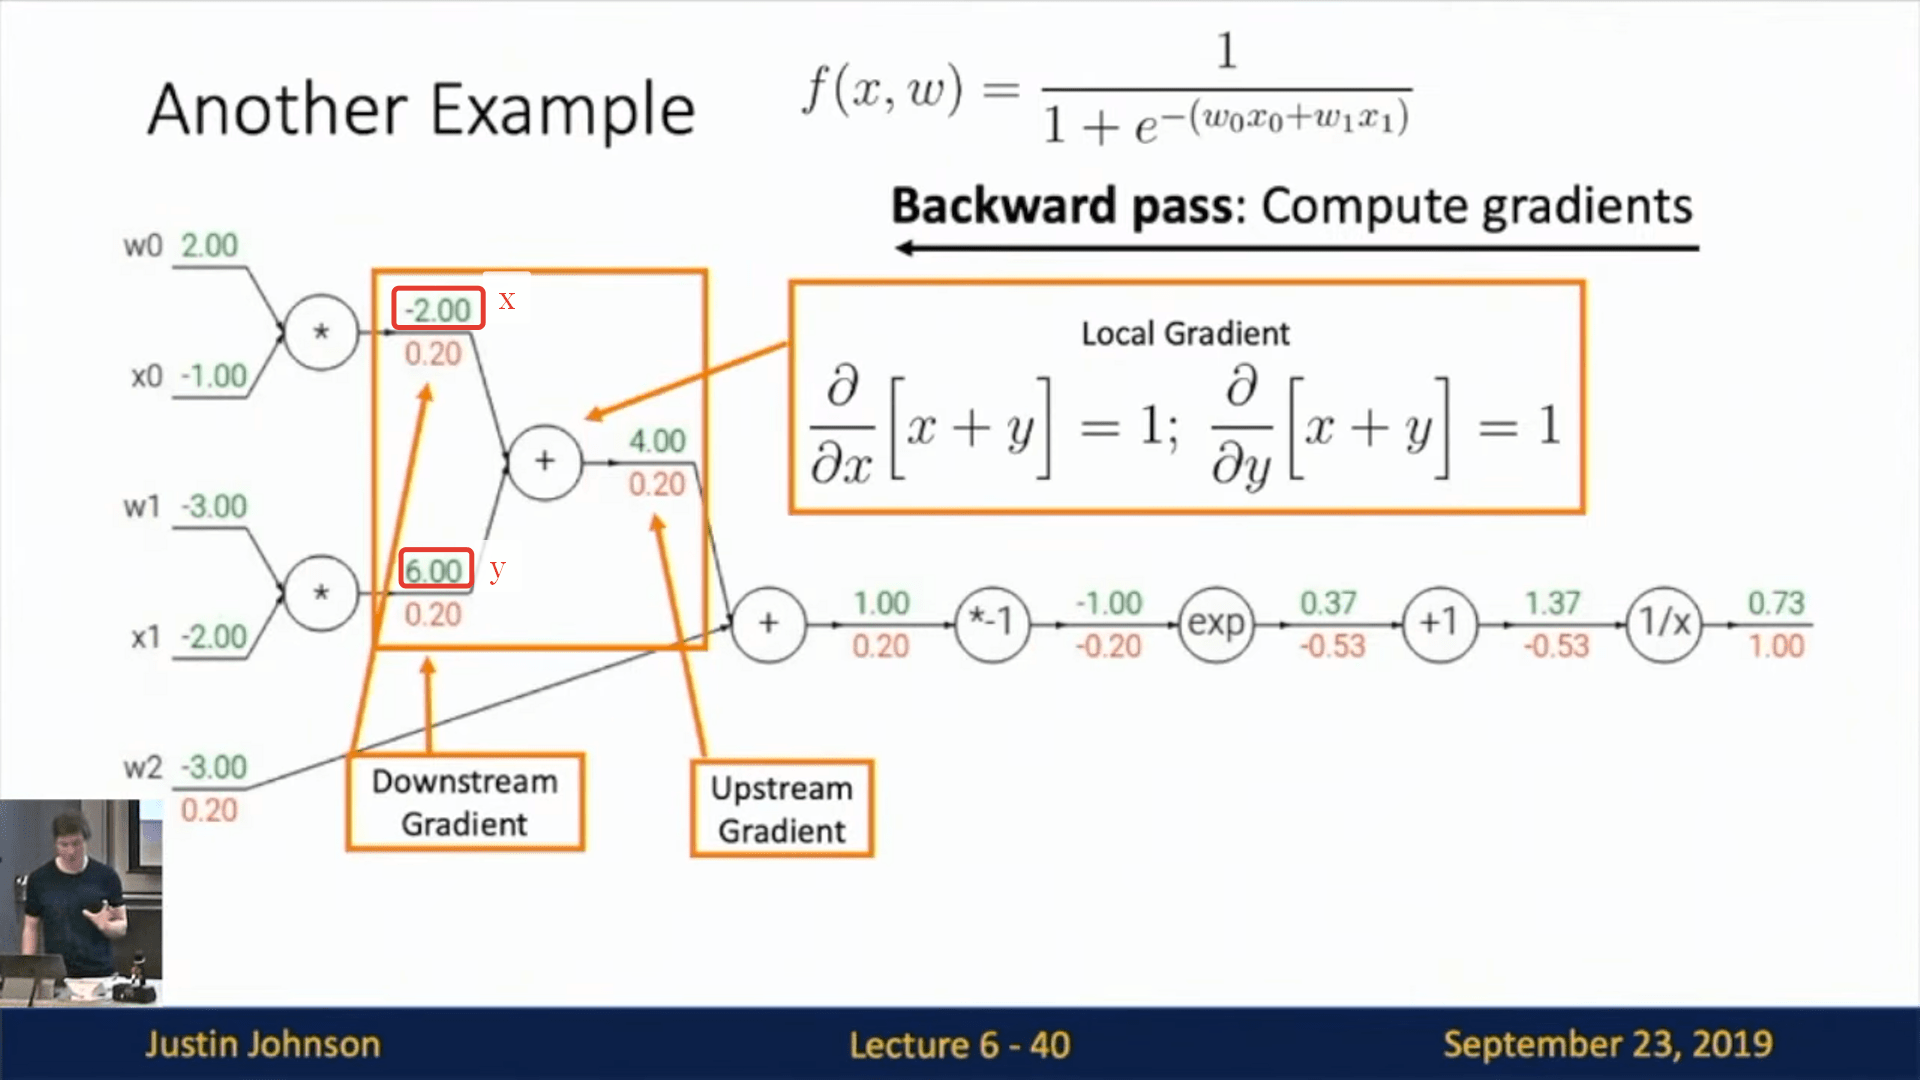



6. Function $ x \cdot y $
    * $ \nabla_{upstream} = \nabla_{downstream} = -0.19$
    * $ \nabla_{local(x)} = \Large\frac{d(xy)}{dx}=y=\normalsize-1$
    * $ \nabla_{local(y)} = \Large\frac{d(xy)}{dy}=x=\normalsize2$
    * $ \nabla_{downstream(x)} = \nabla_{upstream}\cdot\nabla_{local(x)}= 0.19\cdot (-1) = -0.19$
    * $ \nabla_{downstream(y)} = \nabla_{upstream}\cdot\nabla_{local(y)}= 0.19\cdot 2 = 0.39$

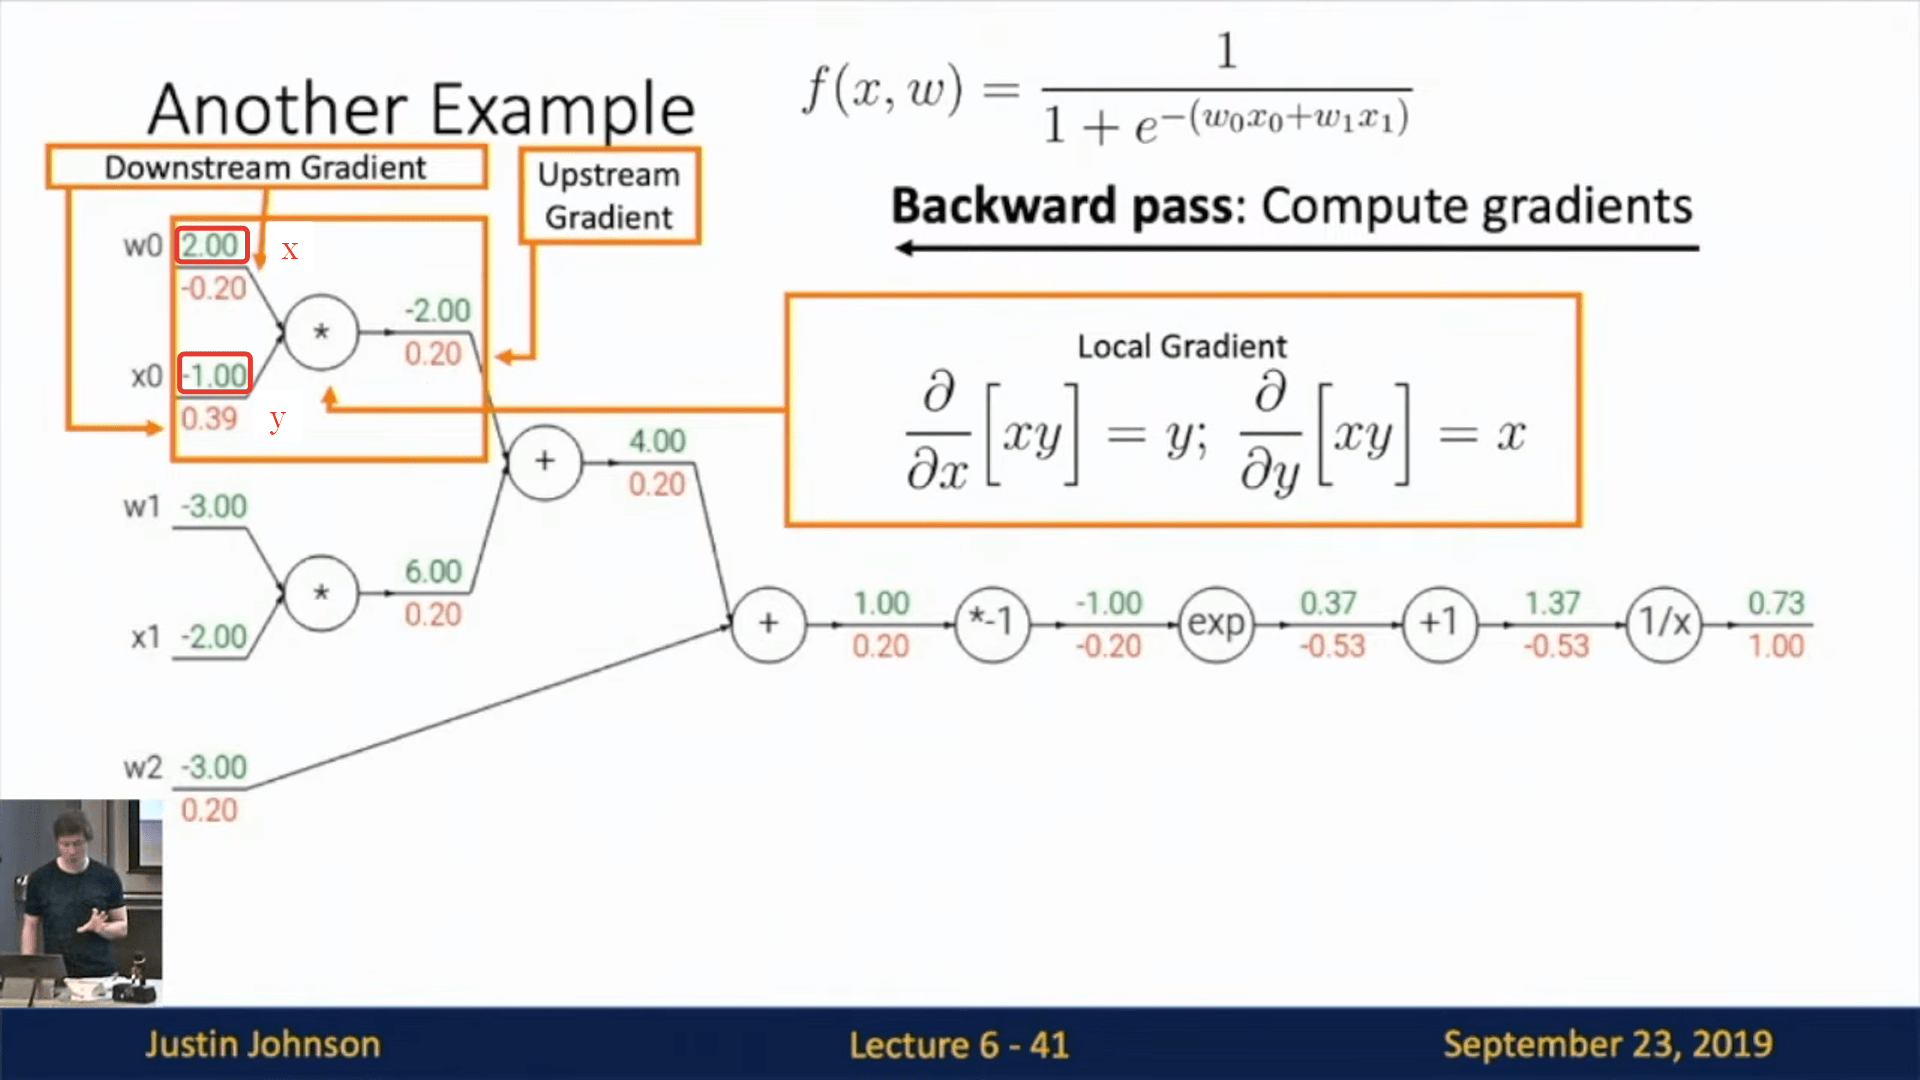


7. Function $ x \cdot y $
    * $ \nabla_{upstream} = \nabla_{downstream} = -0.19$
    * $ \nabla_{local(x)} = \Large\frac{d(xy)}{dx}=y=\normalsize-2$
    * $ \nabla_{local(y)} = \Large\frac{d(xy)}{dy}=x=\normalsize-3$
    * $ \nabla_{downstream(x)} = \nabla_{upstream}\cdot\nabla_{local(x)}= 0.19\cdot (-2) = -0.39$
    * $ \nabla_{downstream(y)} = \nabla_{upstream}\cdot\nabla_{local(y)}= 0.19\cdot (-3) = 0.59$

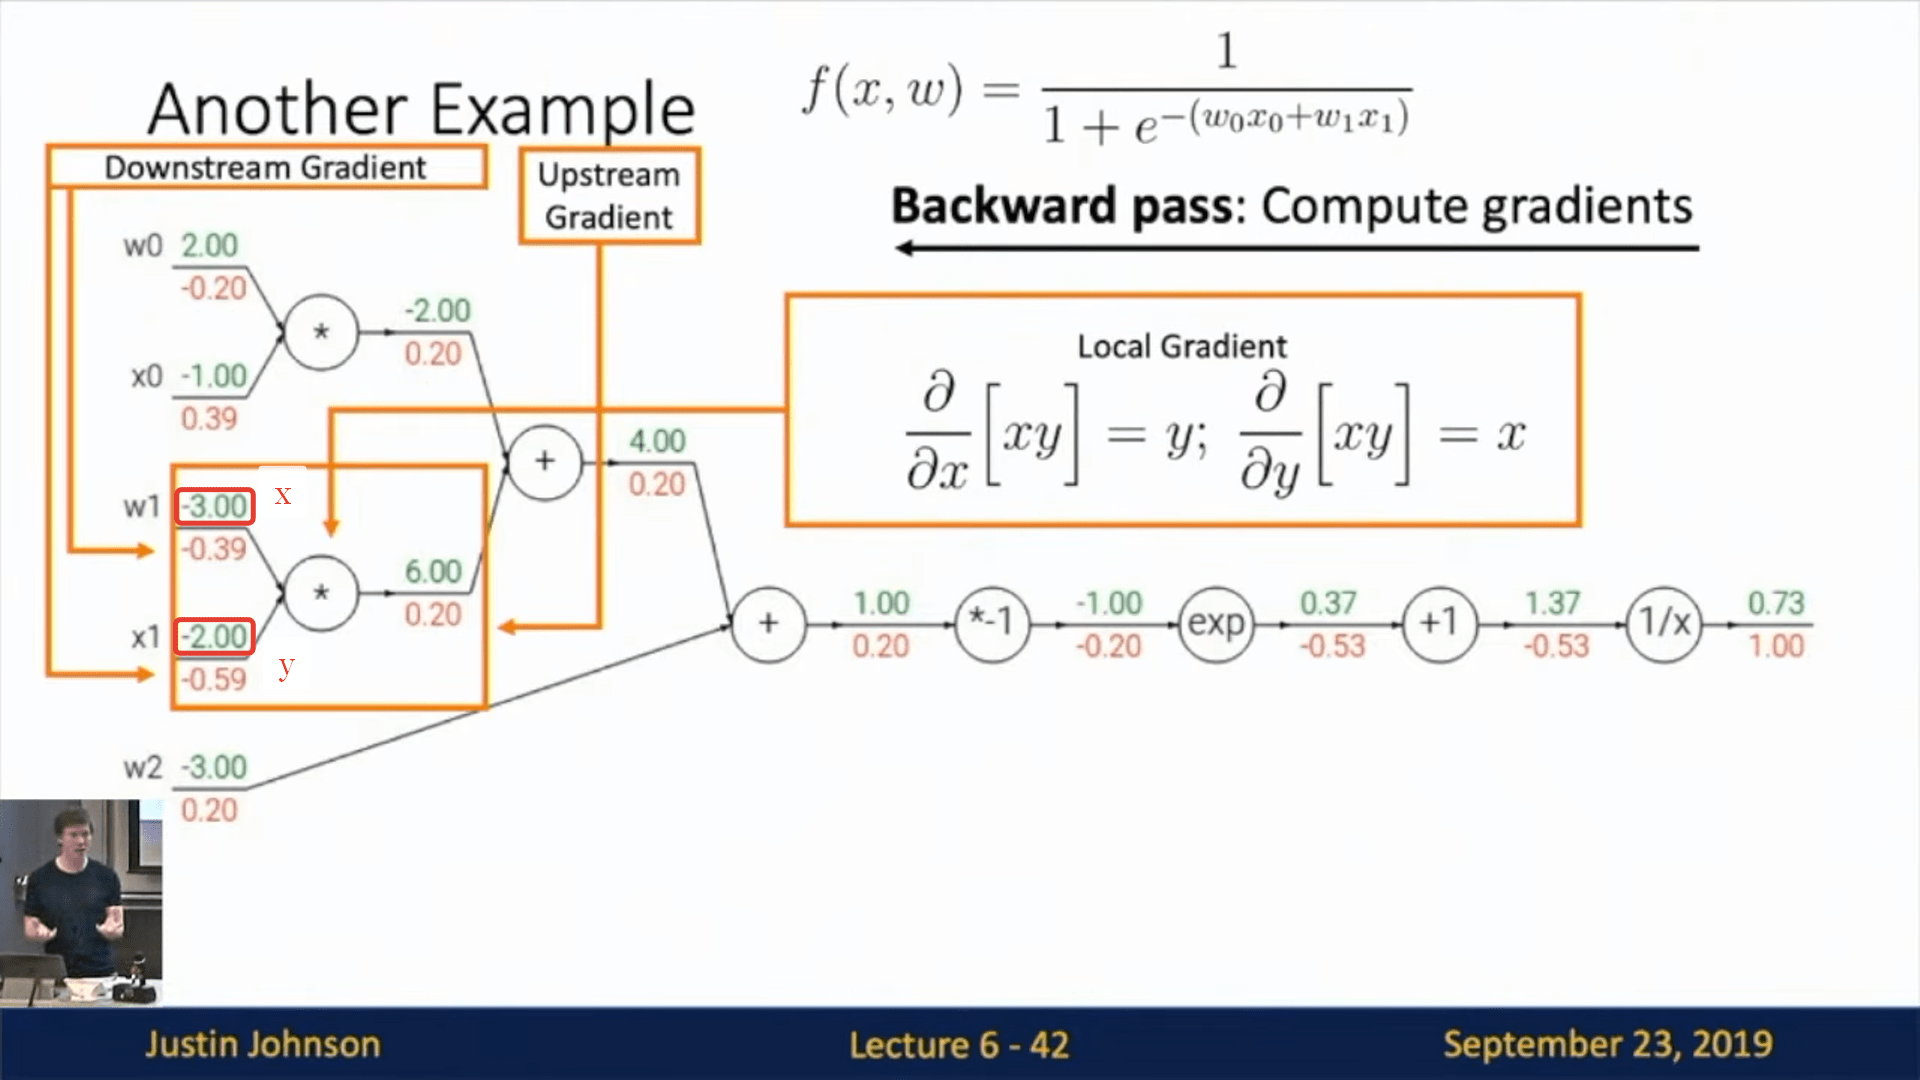

# Пример 3

*Для самостоятельного решения*

Функция $ f(x, y, z) = (x^2 + sin(x))e^z $

Входные переменные: $x=0, y=-1, z=1 $